- Measuring $X$ (e.g., calls per min at call center) in population:
    - follows some distribution (Poisson)
    - population mean $\mu$
    - population variance $\sigma^2$

- $X$ is a random variable.

Can rescale/shift:

$$ Y = \frac{X - \mu}{\sigma} $$

- measures how far individual is from population mean in unit of standard deviation of population 

Rescaled/shift:

$$ Y =  \frac{X - \mu}{\sigma} $$

- Mean of $Y$ over population is 0.
- Standard deviation of $Y$ is 1.

Take a sample of size N : $X_1, X_2,...,X_N$

After shifting by population mean and rescaling by population standard deviation:

$$ Y_1,Y_2,...Y_N $$

#### A more precise statement of the central limit theorem:

If a random variable $Y_i$ has mean 0 and variance 1, then for sufficiently large $N$:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

is normally distributed with mean 0 and standard deviation 1.

In [67]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

In [152]:
average_count_min = 2.5
# for Poisson turns out variance is equal to mean
var_count_min = average_count_min

sample_trial = poisson.rvs(mu = average_count_min, size = 250)

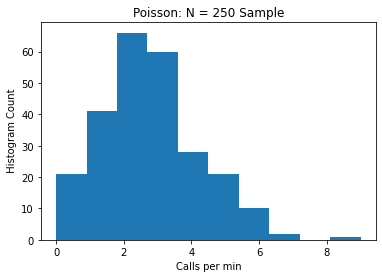

In [170]:
plt.hist(sample_trial)
plt.xlabel('Calls per min')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.show()

In [159]:
sample_trial.mean()

2.612

In [160]:
sample_trial.var()

2.605456

Now conduct rescaling/shifting of sample:

$$ Y = \frac{X - \mu}{\sigma} $$

In [161]:
rescaled_sample = (sample_trial - average_count_min)/np.sqrt(var_count_min)

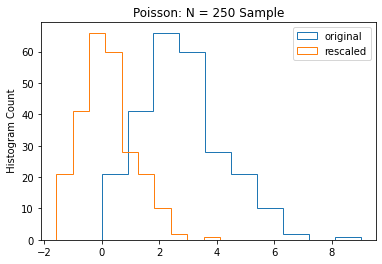

In [171]:
fig,ax = plt.subplots()
ax.hist(sample_trial, histtype = 'step', label = 'original' )
ax.hist(rescaled_sample, histtype = 'step', label = 'rescaled')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.legend()
plt.show()

In [164]:
rescaled_sample.mean()

0.07083501958777168

In [165]:
rescaled_sample.std()

1.020873351596563

Now, get sum of rescaled sample divided by square root of number of samples:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

But let's do this for many trials of N-samples to build up statistics on $S_N$.

In [167]:
# standard deviation
std_count_min = np.sqrt(var_count_min)
# repeat sampling and for each sample subtract by population mean and divide by standard deviation.
many_rescaled_sample_trials = [(poisson.rvs(mu = average_count_min, size = 250) - average_count_min)/ std_count_min
                      for trial in range(10000)]


In [177]:
# compute the sum of each sample and divide by square root of the number in each sample
Sn_array = np.array([np.sum(sample)/np.sqrt(len(sample)) for sample in many_rescaled_sample_trials])

Central limit theorem tells me $S_n$ normally distributed:
- Mean 0 
- Standard deviation 1

Is this true?

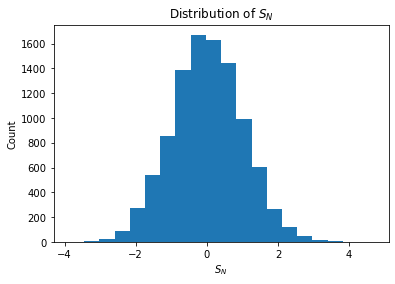

In [178]:
plt.hist(Sn_array, bins = 20)
plt.xlabel('$S_N$')
plt.ylabel('Count')
plt.title('Distribution of $S_N$')
plt.show()

In [180]:
Sn_array.mean()

0.014727999999999955

In [181]:
Sn_array.std()

1.007550716349306

We have just seen that:

Provided N large enough

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

is distributed normal with mean 0, std 1.